### Final Project: Rockify — Rock Music Subgenre Classifier

A Machine-Learning Practice using Random Forest Classification Algorithm and Comparative Analysis with Other Models

- Department: Master of Science in Technology Innovation, University of Washington
- Team Members: Yvonne Yang, Jiahui Kao, Emily Chou, Chia-Wei Chang

##### Introduction

This project aims to develop a machine-learning model for music genre classification to identify various rock music sub-genres. Our model, Rockify, is trained on a dataset of rock music from Spotify to classify songs into specific sub-genres, including but not limited to classic rock, alternative, and heavy metal. In this report, we will guide you comprehensively through the methods used, the model, the results, and an in-depth discussion of the implications of this breakthrough in music technology. 

##### Content

- Part A. Rockify's Data Extration: This part uses the Spotify API and the Spotipy library to extract information about the tracks in a Spotify playlist and save it in a CSV file. 

- Part B. Rockify's ML Training Models & Evaluations: This part builds and evaluates various classifier models. The data set (Rockify_Dataset.csv) is extensively collected through the methods in Part A.

- Part C. Rockify User Access: This part allows users to find subgenres of their songs by entering the URL of the music on Spotify.

##### Part A. Rockify's Data Extration

The following code uses the Spotify API and the Spotipy library to extract information about the tracks in a Spotify playlist and save it in a CSV file. 

Step 1. Import necessary libraries

In [1]:
# spotipy is a Python library for interacting with the Spotify API.
import spotipy

# SpotifyClientCredentials is a class from spotipy.oauth2 used to 
# authenticate with the Spotify API using client ID and client secret.
from spotipy.oauth2 import SpotifyClientCredentials

# csv is a Python library for reading and writing CSV files.
import csv

Step 2. Load credentials from .env file

In [2]:
# client_id and client_secret are the unique identifiers provided by Spotify 
# when you register your application to use the Spotify API.
# You can apply your client ID and secret for free from: 
# https://developer.spotify.com/dashboard/applications
client_id = "Your ID"
client_secret = "Your Secret"

# SpotifyClientCredentials is used to obtain an access token by 
# providing client_id and client_secret, which is then used to authenticate the spotipy.
client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret)

# Spotify object, sp, that we will use later in the code.
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Step 3. Specify the ID of the Spotify playlist you want to extract

In [3]:
# playlist_id is the unique identifier of the Spotify playlist that 
# we want to extract information from.
playlist_id = "1YC2hYS5awhGQBNaCObjyK"

Step 4. Get all the tracks in the playlist

In [4]:
# sp.playlist_tracks() method is used to get a list of all the tracks in the 
# specified playlist, playlist_id, using the spotipy.Spotify object, sp.
tracks = sp.playlist_tracks(playlist_id)

Step 5. Create a new CSV file to store the dataset <br/>
Step 6. Write the header row of the csv file <br/>
Step 7. Loop through each track and extract its information

In [5]:
# A new file named classic2.csv is created in write mode using the open() method from the csv library.
with open("test_dataset.csv", mode="w", newline="") as file:
    
    # A csv.writer object is created, which will be used to write data to the CSV file.
    writer = csv.writer(file)

    # A list of header row column names is created and written to the CSV file 
    # using the writerow() method from the csv.writer object created earlier.
    header = ['Track ID', 'Track Name', 'Artist', 'Album', 'Duration (ms)', 
              'Dance Ability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
              'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
    
    # Write the header row of the csv file.
    writer.writerow(header)
    
    # Loop through each track and extract its information.
    for track in tracks['items']:
       
       ## Get the track information.
       
       # track_id: The unique ID of the track in the Spotify database.
       track_id = track['track']['id']    
       # track_name: The name of the track.
       track_name = track['track']['name']
       # artist: The name of the artist.
       artist = track['track']['artists'][0]['name']
       # album: The name of the album the track is from.
       album = track['track']['album']['name']
       # duration_ms: The duration of the track in milliseconds.
       duration_ms = track['track']['duration_ms']

       # Use the track_id to obtain the audio features for the track 
       # using the sp.audio_features() function. 
       audio_features = sp.audio_features(track_id)[0]
       
       ## Extract the audio features.
       
       # danceability: A value representing how suitable the track is 
       #               for dancing based on a combination of musical elements.
       danceability = audio_features['danceability']
       # energy: A value representing the intensity and activity level of the track.
       energy = audio_features['energy']
       # key: The musical key the track is in.
       key = audio_features['key']
       # loudness: The overall loudness of the track in decibels.
       loudness = audio_features['loudness']
       # mode: Whether the track is in a major or minor key.
       mode = audio_features['mode']
       # speechiness: A value representing the amount of spoken word in the track.
       speechiness = audio_features['speechiness']
       # acousticness: A value representing how acoustic the track is.
       acousticness = audio_features['acousticness']
       # instrumentalness: A value representing how instrumental the track is.
       instrumentalness = audio_features['instrumentalness']
       # liveness: A value representing the presence of a live audience in the recording.
       liveness = audio_features['liveness']
       # valence: A value representing the musical positiveness conveyed by a track.
       valence = audio_features['valence']
       # tempo: The overall tempo or speed of the track in beats per minute.
       tempo = audio_features['tempo']

       # Write the row to the CSV file.
       row = [track_id, track_name, artist, album, duration_ms, 
              danceability, energy, key, loudness, mode, speechiness, 
              acousticness, instrumentalness, liveness, valence, tempo]
       writer.writerow(row)

##### Part B. Rockify's ML Training Models & Evaluations

The following code builds and evaluates various classifier models. The data set (Rockify_Dataset.csv) is extensively collected through the methods in Part A.

Step 1. Import necessary libraries

In [11]:
# Used in Step 2
import os

# Used in Step 2-4
import pandas as pd

# Used in Step 4
import seaborn as sns
import matplotlib.pyplot as plt

# Used in Step 5
from sklearn.model_selection import train_test_split

# Used in Step 6
from sklearn.tree import DecisionTreeClassifier

# Used in Step 6-7
from sklearn.metrics import confusion_matrix

# Used in Step 6-11
from sklearn.metrics import accuracy_score

# Used in Step 7
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Used in Step 8
from sklearn.neighbors import KNeighborsClassifier

# Used in Step 9
from sklearn.svm import SVC

# Used in Step 10
from sklearn.linear_model import LogisticRegression

Step 2. Load the dataset file

In [15]:
# Get the current working directory.
cwd = os.getcwd()

# Set the path to the project dataset file
rockify_dataset_csv = os.path.join(cwd, "Rockify_Dataset.csv")

# Load the 'Rockify_Dataset.csv' file from the local system using 
# the pandas library's read_csv function and stores it in the data variable.
data = pd.read_csv("Rockify_Dataset.csv", encoding="ISO-8859-1")

Step 3. Cleaning non-numeric data

The code drops the 'Track Name' column using the pandas drop function and removes any non-numeric values from the 'Genre' column by converting them to numeric values using a dictionary. **This step ensures that the 'Genre' column contains only numeric values, which is necessary for the machine learning algorithms used later in the code.**

In [16]:
# Drop Track Name.
data = data.drop(['Track Name'], axis=1)

# Next, we convert the values in the 'Genre' column, which is a categorical variable, 
# to numeric values. It first obtains the unique values of the 'Genre' column and converts 
# them to a list using the unique and tolist functions, respectively.
genre_values = data['Genre'].unique().tolist()

# We then create a dictionary that maps each genre to a unique integer value. 
# The for loop iterates through the values in the genre_values list and 
# assigns each value to a unique integer. The resulting dictionary is stored 
# in the genre_dic variable.
genre_dic = {}
for i in range(len(genre_values)):
    genre_dic[genre_values[i]] = i

# Finally, the map function of the Pandas library is used to apply the dictionary to 
# the 'Genre' column, converting each genre value to its corresponding integer value.
data['Genre'] = data['Genre'].map(genre_dic)

Step 4. Visualizing variable correlation

The code creates a heatmap of the variable correlation between different columns in the data using the seaborn library's heatmap function and visualizes it using the plt.show() function. The purpose of visualizing the variable correlation is to gain insights into the relationships between the different features in the dataset. The code generates a heatmap of the correlation matrix using the seaborn library, which provides a graphical representation of the pairwise correlations between the features.

The resulting plot provides a visual representation of the correlation between each pair of features in the dataset, with darker colors indicating stronger positive correlations and lighter colors indicating stronger negative correlations. **By examining the heatmap, we can identify which features are most strongly correlated with each other, which can be useful for feature selection and model building.** 

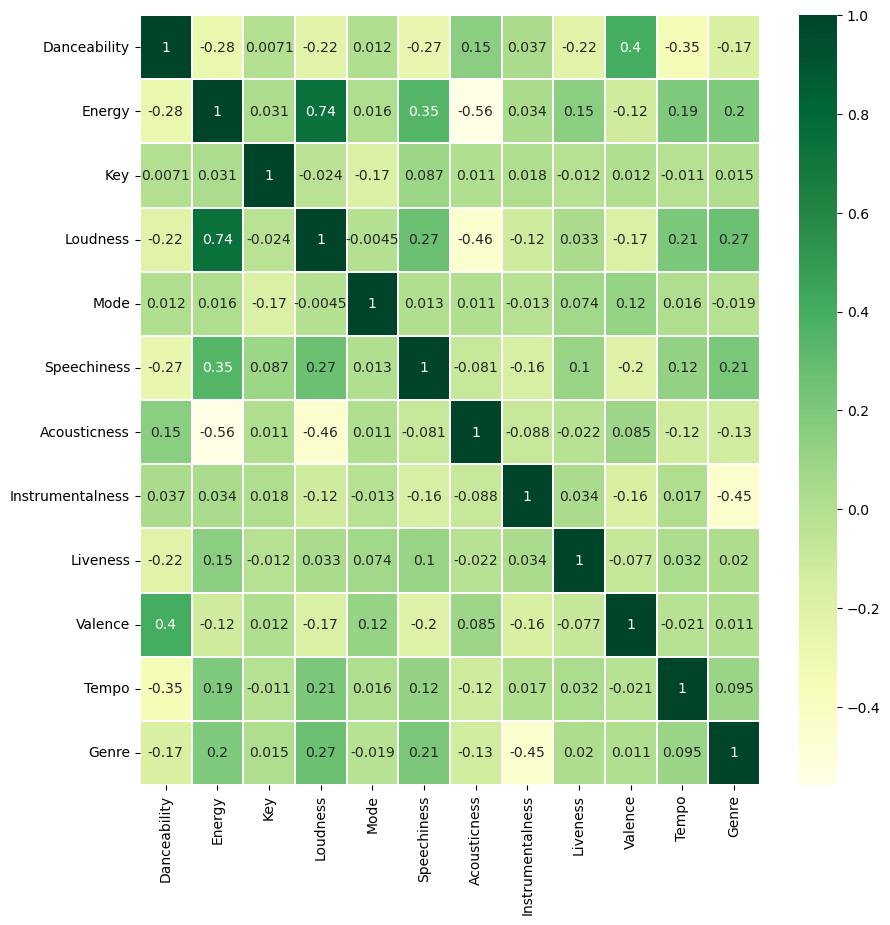

In [18]:
plt.figure(figsize=(10, 10))

# We use the sns.heatmap() function to create a heatmap of he correlation matrix, 
# passing in the data.corr() function as an argument to 
# compute the correlation between each pair of columns. 
# The annot=True parameter is used to display the correlation coefficients in each cell.
# The cmap parameter is used to set the color map for the heatmap.
sns.heatmap(data.corr(), annot=True, cmap='YlGn', linewidths=0.2)

fig = plt.gcf()
plt.show()

Step 5. Splitting the data:

The code splits the data into training and testing sets using the train_test_split function from the scikit-learn library.

- Features: These are the **input variables** or independent variables that are used to make predictions or **to train the model**. 
- Target: This is the **output variable** or dependent variable that **we want to predict** or classify.

The number 42 is a reference to the book "The Hitchhiker's Guide to the Galaxy" by Douglas Adams. In the book, a group of hyper-intelligent beings ask a supercomputer named Deep Thought to calculate the answer to the ultimate question of life, the universe, and everything. After much anticipation, Deep Thought finally reveals that the answer is 42, but the characters are disappointed because they don't know what the question is.

The use of 42 as the value for random_state in the train_test_split() function is a playful reference to this book and has become a convention among many data scientists and machine learning practitioners. However, in practice, any non-negative integer value can be used for random_state. 

In [19]:
# X, y are the features and target variables respectively.

X = data.drop(['Genre'], axis=1)
y = data['Genre']

# test_size = 0.2 specifies that 20% of the data should be used for testing.
# random_state = 42 ensures that the same random split is obtained each time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the following steps, we are going to implement Random Forest, Decision Tree, KNN, SVM, and Logistic Regression.

Step 6. Building and Evaluating: Decision Tree Classifier Model

In [22]:
# A DecisionTreeClassifier() model is initialized with the default hyperparameters.
dt_model = DecisionTreeClassifier()

# The model is trained using the training data using the .fit() function.
dt_model.fit(X_train, y_train)

# The predictions for the test data are then made using the .predict() function, 
# and these predictions are stored in the y_pred variable.
y_pred = dt_model.predict(X_test)

## Evaluate the model.

# The accuracy_score() function calculates the accuracy of the model on the test data, 
# which is the fraction of correctly classified examples over the total number of examples.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')

# The confusion_matrix() function returns a confusion matrix that summarizes the number of 
# true positives, true negatives, false positives, and false negatives for each class.
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')

# The classification_report() function returns a string that summarizes 
# the classification metrics for each class in a tabular format. 
# The metrics include precision, recall, f1-score, and support
# (the number of samples in each class).
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.45989304812834225 

Confusion Matrix:
 [[22  3  4  2  1]
 [ 8 25 13  1  2]
 [ 2  5  8 28  0]
 [ 3  3 20 13  0]
 [ 3  3  0  0 18]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.58      0.69      0.63        32
           1       0.64      0.51      0.57        49
           2       0.18      0.19      0.18        43
           3       0.30      0.33      0.31        39
           4       0.86      0.75      0.80        24

    accuracy                           0.46       187
   macro avg       0.51      0.49      0.50       187
weighted avg       0.48      0.46      0.47       187



Step 7-1. Building and Evaluating: Random Forest Classifier Model

In [41]:
# A random forest classifier model is created with 100 estimators and a maximum depth of 10.
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# The model is trained using the training data using the .fit() function.
rfc_model.fit(X_train, y_train)

# The model is used to predict the genre of the test data (X_test). 
# The predicted genre values are stored in y_pred.
y_pred = rfc_model.predict(X_test)

# Evaluate the model.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.5935828877005348 

Confusion Matrix:
 [[23  3  3  3  0]
 [ 2 41  3  1  2]
 [ 1  5 10 27  0]
 [ 1  5 17 16  0]
 [ 0  2  0  1 21]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.73      0.84      0.78        49
           2       0.30      0.23      0.26        43
           3       0.33      0.41      0.37        39
           4       0.91      0.88      0.89        24

    accuracy                           0.59       187
   macro avg       0.63      0.61      0.62       187
weighted avg       0.59      0.59      0.59       187



Step 7-2. Perform a grid search to find the best hyperparameters for the random forest model

In [ ]:
## Note: This part will take longer, like an hour. Or you can use the hyperparameters 
#        we have already found in the next section. 

# The param_grid dictionary contains a set of values to be tested for the hyperparameters 
# such as the number of trees in the forest (n_estimators), 
# the maximum depth of each tree (max_depth), 
# the minimum number of samples required to split a node (min_samples_split), 
# the minimum number of samples required to be at a leaf node (min_samples_leaf), and 
# the method of sampling data (bootstrap).
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'class_weight': [None, 'balanced']}

# The GridSearchCV function from the scikit-learn library performs the grid search 
# by fitting the model with each set of hyperparameters and 
# evaluating its performance using cross-validation.
# The cv parameter specifies the number of folds for the cross-validation.
model_for_grid_search = RandomForestClassifier()
grid_search = GridSearchCV(model_for_grid_search, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Once the grid search is complete, the best hyperparameters are 
# returned using the best_params_ attribute.
bootstrap, class_weight, criterion, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators = grid_search.best_params_.values()
print('The best hyperparameters are:', grid_search.best_params_, '\n')

In [127]:
# One of the best hyperparameters we have already found. 
bootstrap = False
class_weight = 'balanced'
criterion = 'entropy'
max_depth = 5
max_features = 'sqrt'
min_samples_leaf = 1
min_samples_split = 5
n_estimators = 100

# Retrain the model using optimal parameters.
optimal_rfc_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                            min_samples_split=min_samples_split, 
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features,
                                            bootstrap=bootstrap,
                                            criterion=criterion,
                                            class_weight=class_weight)
optimal_rfc_model.fit(X_train, y_train)
y_pred = optimal_rfc_model.predict(X_test)

# Evaluate the model.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6310160427807486 

Confusion Matrix:
 [[24  4  1  2  1]
 [ 2 38  5  1  3]
 [ 3 11 18  9  2]
 [ 3  7 13 15  1]
 [ 0  1  0  0 23]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.62      0.78      0.69        49
           2       0.49      0.42      0.45        43
           3       0.56      0.38      0.45        39
           4       0.77      0.96      0.85        24

    accuracy                           0.63       187
   macro avg       0.64      0.66      0.64       187
weighted avg       0.62      0.63      0.62       187



Step 8. Building and Evaluating: K-Nearest Neighbors Classifier Model

In [31]:
# A K-nearest neighbors classifier model is created with 5 neighbors.
knn_model = KNeighborsClassifier(n_neighbors=5)

# The model is trained using the training data using the .fit() function.
knn_model.fit(X_train, y_train)

# The model is used to predict the genre of the test data (X_test). 
# The predicted genre values are stored in y_pred.
y_pred = knn_model.predict(X_test)

# Evaluate the model.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.32085561497326204 

Confusion Matrix:
 [[11 10  8  2  1]
 [12 28  3  5  1]
 [ 4 14  7 14  4]
 [10 10  7 10  2]
 [ 2  6 10  2  4]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.28      0.34      0.31        32
           1       0.41      0.57      0.48        49
           2       0.20      0.16      0.18        43
           3       0.30      0.26      0.28        39
           4       0.33      0.17      0.22        24

    accuracy                           0.32       187
   macro avg       0.31      0.30      0.29       187
weighted avg       0.31      0.32      0.31       187



/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Step 9. Building and Evaluating: Support Vector Machine (SVM) Classifier Model

In [30]:
# A support vector machine (SVM) classifier model is created with 
# a radial basis function (RBF) kernel, 
# a regularization parameter of 1.0, and 
# an auto value for the gamma parameter. 
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')

# The model is trained using the training data using the .fit() function.
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the model.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.28342245989304815 

Confusion Matrix:
 [[ 4  8 12  8  0]
 [ 8 29  4  7  1]
 [ 2 13  4 21  3]
 [ 3 11 11 13  1]
 [ 0  6  9  6  3]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.24      0.12      0.16        32
           1       0.43      0.59      0.50        49
           2       0.10      0.09      0.10        43
           3       0.24      0.33      0.28        39
           4       0.38      0.12      0.19        24

    accuracy                           0.28       187
   macro avg       0.28      0.25      0.24       187
weighted avg       0.27      0.28      0.26       187



Step 10. Building and Evaluating: Logistic Regression Classifier Model

In [29]:
# Using logistic regression models to predict Genre.
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model.
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Classfication Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.43315508021390375 

Confusion Matrix:
 [[19  6  1  5  1]
 [ 2 32  3 10  2]
 [ 1 19  6 11  6]
 [ 2 11  4 14  8]
 [ 0  8  1  5 10]] 

Classfication Report:
               precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.42      0.65      0.51        49
           2       0.40      0.14      0.21        43
           3       0.31      0.36      0.33        39
           4       0.37      0.42      0.39        24

    accuracy                           0.43       187
   macro avg       0.46      0.43      0.42       187
weighted avg       0.45      0.43      0.42       187



/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Part C. User Input

The following code allows users to find subgenres of their songs by entering the URL of the music on Spotify.

In [160]:
import re
import numpy as np

# Prompt user for a song URL
print('Please enter the song URL: ')
song_url = input('Please enter the song URL: ')
print(song_url, '\n')

# Extract the song ID from the URL
track_id = re.search(r'track/(\w+)', song_url).group(1)
print('[Rockify] The Song\'s Track ID is: ', track_id)

# Set up credentials for the Spotify API
# client_id and client_secret are the unique identifiers provided by Spotify 
# when you register your application to use the Spotify API.
# You can apply your client ID and secret for free from: 
# https://developer.spotify.com/dashboard/applications
client_id = "Your ID"
client_secret = "Your Secret"
redirect_uri = 'http://localhost:8888/callback'

# Authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Retrieve audio features for the specified song
audio_features = spotify.audio_features([track_id])[0]

# Select features of interest
features_of_interest = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Extract features of interest from the audio features
selected_features = [audio_features[feature.lower()] for feature in features_of_interest]

# Convert selected features to a numpy array
selected_features_array = np.array(selected_features).reshape(1, -1)

# Use a pre-trained model to make a prediction based on the selected features
prediction = optimal_rfc_model.predict(selected_features_array)

# Create a new dictionary that maps values to keys
reverse_dic = {v: k for k, v in genre_dic.items()}

# Find the key that corresponds to the value you want to search for
subgenre = reverse_dic.get(prediction[0])

# Print the keys
print('[Rockify] This song likely belongs to:', subgenre)


Please enter the song URL: 
https://open.spotify.com/track/1RxLSgcsZimzKnpCLzdVsi?si=0f467b26c4f84abd 

[Rockify] The Song's Track ID is:  1RxLSgcsZimzKnpCLzdVsi
[Rockify] This song likely belongs to: Punk Rock


/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
